<a href="https://colab.research.google.com/github/wakamatsuikuma/scratch-deeplearning/blob/main/Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# coding: utf-8

import sys, os
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/dataset")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/common")
ｓys.path.append("/content/drive/MyDrive/ゼロからつくるディープラーニング/Ch4")

import numpy as np
from mnist import load_mnist
from PIL import Image
from IPython.display import display
import pickle
from functions import sigmoid, softmax

# グーグルコラボなので画像表示はこれ使う
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    display(pil_img)

# ファイルをアップロード
from google.colab import files
uploaded = files.upload()


In [ ]:
"""
２乗和誤差の実装
"""

def sum_squared_error(y, t):
  return 0.5*np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0, 0.1, 0, 0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0, 0.6, 0, 0]

error1 = sum_squared_error(np.array(y1), np.array(t))
error2 = sum_squared_error(np.array(y2), np.array(t))
print(error1)
print(error2)

0.09750000000000003
0.5975


In [ ]:
"""
交差エントロピー誤差の実装
"""

def cross_entropy_error(y, t):
  delta =1e-7
  return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0, 0.1, 0, 0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0, 0.6, 0, 0]

error1 = cross_entropy_error(np.array(y1), np.array(t))
error2 = cross_entropy_error(np.array(y2), np.array(t))
print(error1)
print(error2)

0.510825457099338
2.302584092994546


In [ ]:
"""
ミニバッチでの抽出
"""

# データ取得/正解ラベルをone-hot表現で取得
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

# ランダムに10枚抜き出す np.random.choice(引数1, 引数2)：0以上引数1未満の中からランダムに引数2個を取得
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)

(60000, 784)
(60000, 10)
[49910  7267  5660  4988 29555 30613 57044 18931 26451 38563]


In [ ]:
"""
バッチ対応の交差エントロピー誤差の実装
"""

# 教師データがone-hot表現の場合
def CrossEntropyError_OneHot(y, t):
  if y.ndim() == 1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 教師データがラベルの場合
def CrossEntropyError(y, t):
  if y.ndim() == 1:
    y = y.reshape(1, y.size)
    t = t.reshape(1, t.size)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-7)) / batch_size # y[np.arrange(batch_size), t]：各データの正解ラベルに対するNNの出力結果を取得

In [ ]:
"""
数値微分の実装
"""

# 悪い例
def numerical_diff_badex(f, x):
  h = 1e-50 # 丸め誤差が生じる
  return (f(x + h) - f(x)) / h # 分子が前方差分となっている

# 改善
def numerical_diff(f, x):
  h = 1e-4 # この程度だと良い結果になることが知られている
  return (f(x + h) - f(x-h)) / (2*h) # 分子を中心差分に変更

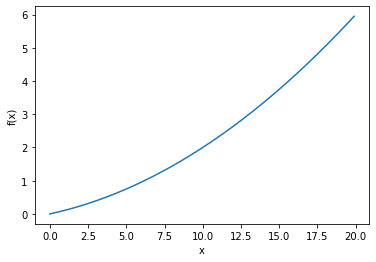

In [ ]:
"""
数値微分の例
"""

import matplotlib.pyplot as plt

def function_1(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff_badex(function_1, 5)

0.0

In [ ]:
"""
数値微分による偏微分の実装
"""

import numpy as np

# 関数f, ｘはNumpy配列であるとしてxの各要素に対して数値微分を求める

def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # xと同じ形状の配列を生成

  for i_dx in range(x.size):
    tmp_x = x[i_dx]

    # f(x + h)の計算
    x[i_dx] = tmp_x + h
    fxh1 = f(x)

    # f(x - h)の計算
    x[i_dx] = tmp_x - h
    fxh2 = f(x)


    grad[i_dx] = (fxh1-fxh2) / (2*h) #　微分結果を追加、注目している次元以外は引き算で消えているイメージかな？
    x[i_dx] = tmp_x

  return grad


In [ ]:
# 適当な関数で勾配計算

def function_2(x):
  return x[0]**2 + x[1]**2

numerical_gradient(function_2, np.array([3.0, 2.0]))

array([6., 4.])

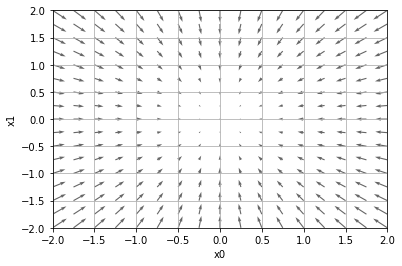

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [ ]:
 """
 勾配降下法の実装
 """
import numpy as np

# まずは勾配計算
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # xと同じ形状の配列を生成

  for id_x in range(x.size):
    tmp_x = x[id_x]

    # f(x + h)の計算
    x[id_x] = tmp_x + h
    fxh1 = f(x)

    # f(x - h)の計算
    x[id_x] = tmp_x - h
    fxh2 = f(x)


    grad[id_x] = (fxh1-fxh2) / (2*h) #　微分結果を追加、注目している次元以外は引き算で消えているイメージかな？
    x[id_x] = tmp_x

  return grad


 # 引数は最適したい関数、　xの初期値、学習率、 繰り返し数（降下回数）
def gradient_descent(f, init_x, lr, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    update_x -= lr * grad
    
  return update_x


In [ ]:
# 適当な関数で勾配降下法の計算

def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
# 学習率が大きすぎると発散
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [ ]:
# 学習率が小さすぎると動かない
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

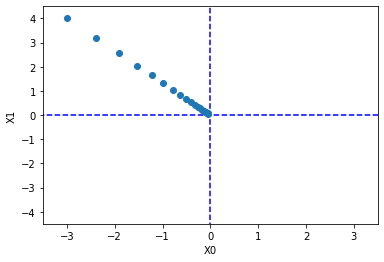

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()
